In [1]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
   INFO  NumExpr defaulting to 3 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor2D.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'z': array([2., 5.])}, required=True)
WARNING 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.b = NArray(label=':math:`b`', dtype=float64, default=array([3.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindma

# Exploring a surface mesh

Surface level simulations in TVB use a triangular mesh surface to represent the 
folded cortical surface, similar triangular mesh surfaces are used to represent 
the boundaries between brain and skull, skull and skin, and skin and air, that 
are used in the calculation of EEG and MEG forward solutions. This tutorial 
covers a few basic ways of looking at the properties of these surfaces.

One of the things we'll be looking for is how well regularised the mesh is -- **a
well regularised a mesh has a narrow distribution of edge lengths and triangle 
areas**. For most uses in TVB, it is important to have a well regularised mesh. 

In [2]:
ctx = cortex.Cortex.from_file()
ctx.configure()
ctx

,value
Type,Cortex
"coupling_strength [min, median, max]","[1, 1, 1]"
coupling_strength dtype,float64
coupling_strength shape,"(1,)"
gid,UUID('18620328-6110-41e9-a72d-500d52f58f08')
local_connectivity,LocalConnectivity gid: a07284c9-8607-4cc6-913b-1c973b471881
region_mapping_data,RegionMapping gid: 991550c2-a60b-4ce0-9ace-daa74d9e543f
title,Cortex gid: 18620328-6110-41e9-a72d-500d52f58f08


We can see a number of basic properties of the mesh here, such as the number of vertices,
edges and triangles making up the surface. A summary of the edge lengths is also included,
this is useful to know what scale of features, eg LocalConnectivity, we can expect to be 
able to represent on this surface. As a Cortex also has a large-scale Connectivity 
associated with it we see some "Region" information as well, here it is TVB's default 76
region connectivity matrix. As we can see, this Connectivity parcellates the cortex into 
regions with a fairly broad range of sizes.

Looking in more detail, we can plot the distributions of things like edge lengths and 
triangle areas to see in more detail whether the mesh is well regularised...

<IPython.core.display.Javascript object>


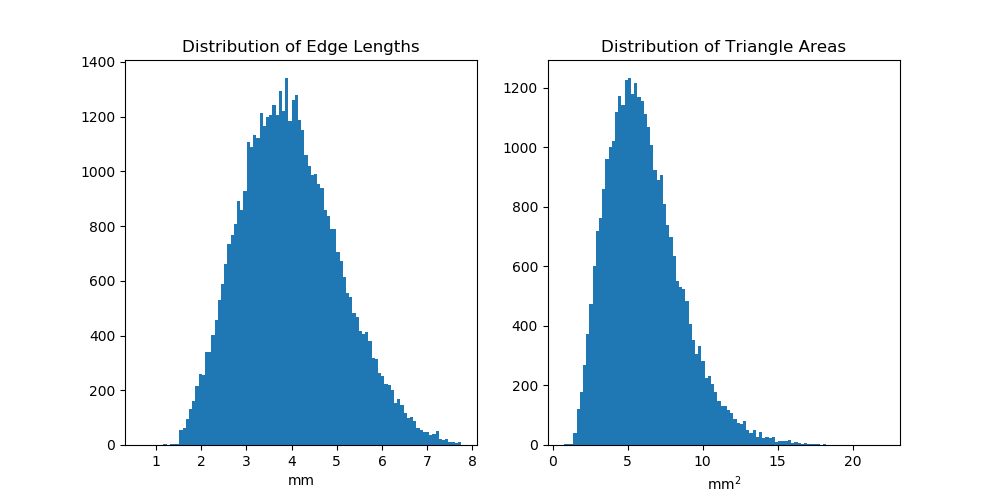

Text(0.5, 0, 'mm$^2$')

In [3]:
figure(figsize=(10, 5))
subplot(121)
hist(ctx.region_mapping_data.surface.edge_lengths, bins=100)
title("Distribution of Edge Lengths")
xlabel("mm")

subplot(122)
hist(ctx.region_mapping_data.surface.triangle_areas, bins=100)
title("Distribution of Triangle Areas")
xlabel("mm$^2$")